### Exercise 1 (Importing data, plotting histograms)

In [46]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Set default Seaborn style
sns.set()

In [48]:
# Import pandas package
import pandas as pd

In [49]:
# Read iris data from csv
iris=pd.read_csv('.\datasets\iris.csv')

In [50]:
# Check the readed data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
# Save the sepal length values to variable 'sepal_length'
sepal_length=iris['sepal_length']

In [52]:
print(sepal_length)

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64


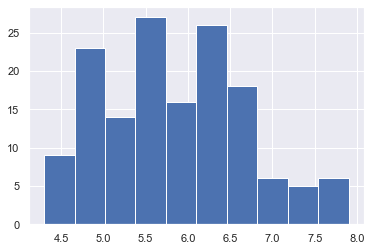

In [53]:
# Plot histogram of sepal lengths
plt.hist(sepal_length)

# Show histogram
plt.show()

Plot the same histogram again, but this time add labels to the axes.

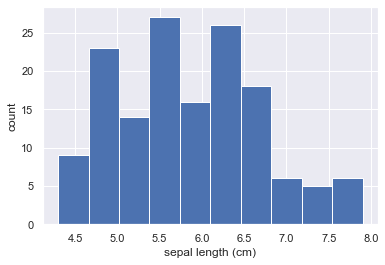

In [54]:
# Plot histogram of sepal lengths
plt.hist(sepal_length)
# Label axes
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
# Show histogram
plt.show()

The histogram you just made had ten bins. This is the default of matplotlib. 

The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. 

Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the bins keyword argument of plt.hist()

In [55]:
# Import numpy package
import numpy as np

In [56]:
# Calculate the number of data, and save it to variable 'n_data' (HINT: length of sepal_length)
n_data=len(sepal_length)
# Calculate the number of bins, and save it to variable 'n_bins' (HINT: square root of n_data)
n_bins=np.sqrt(n_data)

In [57]:
# Check the result you got for n_bins
print(n_bins)
# Convert it to integer (this will be the number of bins...)
n_bins=int(n_bins)
n_bins

12.24744871391589


12

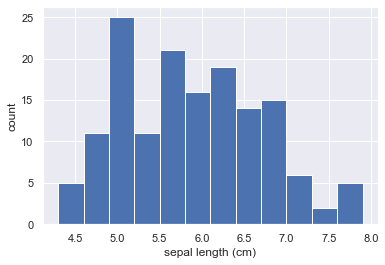

In [58]:
# Plot histogram of sepal lengths, and set the number of bins
plt.hist(sepal_length,n_bins)
# Label axes
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
# Show histogram
plt.show()

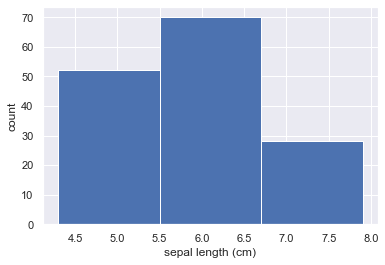

In [59]:
# Try a very small and a very big number as the number of bins to understand why "square root rule" is so useful
# Plot histogram of sepal lengths
plt.hist(sepal_length,3)
# Label axes
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
# Show histogram
plt.show()

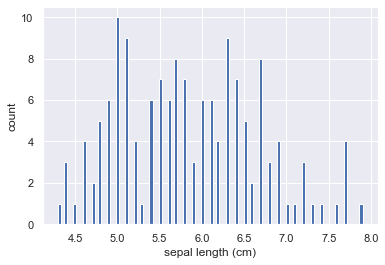

In [60]:
plt.hist(sepal_length,100)
# Label axes
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
# Show histogram
plt.show()

### Exercise 2 (Empirical cumulative distribution function)

* step function that jumps up by 1/n at each of the n data points
* Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value.
* x axis: data points
* y axis from 0 to 1

Computing the ECDF

In this exercise, you will write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. ECDFs are among the most important plots in statistical analysis. You can write your own function, foo(x,y) according to the following skeleton:

def foo(a,b):<br>
    # Computation performed here
    
    return x, y
The function foo() above takes two arguments a and b and returns two values x and y. The function header def foo(a,b): contains the function signature foo(a,b), which consists of the function name, along with its parameters.<br>

Define a function with the signature ecdf(data).
<ul>
<li>Compute the number of data points, n, using the len() function.</li>
<li>The x-values are the sorted data. Use the np.sort() function to perform the sorting.</li>
<li>The y data of the ECDF go from 1/n to 1 in equally spaced increments. You can construct this using np.arange(). Remember, however, that the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. Be sure to divide this by n.</li>
<li>The function returns the values x and y.</li>    
</ul>




In [61]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

You will now use your ecdf() function to compute the ECDF for the sepal lengths of the Iris flowers. <br>
You will then plot the ECDF. Recall that your ecdf() function returns two arrays so you will need to unpack them. An example of such unpacking is x, y = foo(data), for some function foo().

<ul>
<li>Use ecdf() to compute the ECDF of sepal_length.
<li>Unpack the output into x_vers and y_vers.
<li>Plot the ECDF as dots. Remember to include marker = '.' and linestyle = 'none' in addition to x_vers and y_vers as arguments inside plt.plot().
<li>Label the axes. You can label the y-axis 'ECDF'.
<li>Show your plot. 


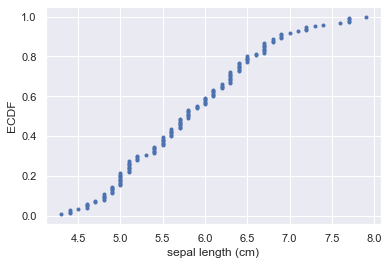

In [62]:
# Compute ECDF for sepal data: x_vers, y_vers
x_vers, y_vers = ecdf(sepal_length)

# Generate plot
plt.plot(x_vers,y_vers, marker='.',linestyle='none')

# Label the axes
plt.xlabel('sepal length (cm)')
plt.ylabel('ECDF')

# Display the plot
plt.show()

In [63]:
# Check the database again
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
# List the species types, save them to variable 'species'
species=[]
for s in iris['species']:
    if s not in species:
        species.append(s)
species

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [65]:
# Collect the following data:
# setosa_petal_length
# versicolor_petal_length
# virginica_petal_length
setosa_petal_length=[]
versicolor_petal_length=[]
virginica_petal_length=[]
for s,p in zip(iris['species'],iris['petal_length']):
    if s == 'Iris-setosa':
        setosa_petal_length.append(p)
    if s =='Iris-versicolor':
        versicolor_petal_length.append(p)
    if s =='Iris-virginica':
        virginica_petal_length.append(p)   


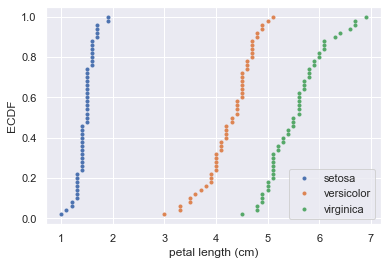

In [66]:
# Compute ECDFs
x_set, y_set=ecdf(setosa_petal_length)
x_vers, y_vers=ecdf(versicolor_petal_length)
x_virg, y_virg=ecdf(virginica_petal_length)


# Plot all ECDFs on the same plot
plt.plot(x_set, y_set, marker='.',linestyle='none')
plt.plot(x_vers,y_vers, marker='.',linestyle='none')
plt.plot(x_virg, y_virg, marker='.',linestyle='none')

# Annotate the plot 
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

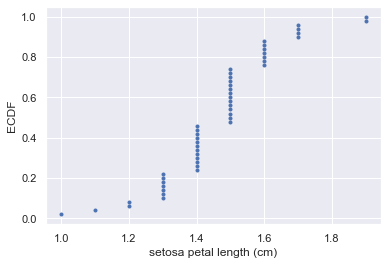

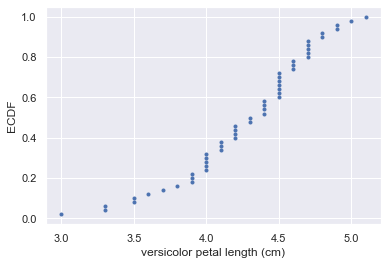

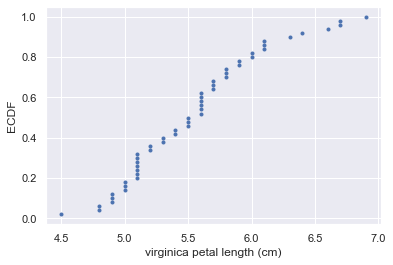

In [67]:
# Plot the ECDFs on different plots

plt.plot(x_set, y_set, marker='.',linestyle='none')
_ = plt.xlabel('setosa petal length (cm)')
_ = plt.ylabel('ECDF')
plt.show()

plt.plot(x_vers,y_vers, marker='.',linestyle='none')
_ = plt.xlabel('versicolor petal length (cm)')
_ = plt.ylabel('ECDF')
plt.show()

plt.plot(x_virg, y_virg, marker='.',linestyle='none')
_ = plt.xlabel('virginica petal length (cm)')
_ = plt.ylabel('ECDF')
plt.show()

